<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/drive/1FS3cBYRf83HTWo6J88kKAQr4kjgoIw_C#scrollTo=LfELTXphq6Ps">
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/SheilKumar/DynamicSystemRNNs">
        <img src="http://introtodeeplearning.com/images/colab/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>


___
**Click on GoogleColab link for most up to date version!**
___







___
# 0.5 Import Dependencies 
___


In [58]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

___
# 1.0 Lorentz System 
___
The first system we will attempt to train our network to predict is the **Lorentz System**:

![Alt Text](https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif)


 

# 1.1 Simulation of Lorentz System 
___

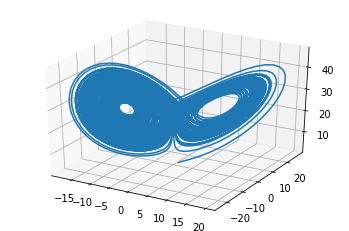

In [59]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 100.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

# 1.2 Training a Network 

In order to train an RNN, we need to first generate and split data from the Lorentz system into a training and testing set. We then need to create the structure of the LSTM that will be used. Finally we need to train the RNN and evaluate its results.



## 1.2.1 Generate and Split Data


In [60]:
# Genereate data
# create vectors of the first 5 states and expected vector of the 6th state 
Data = [[states[i+j]/(100/0.1) for i in range(5)] for j in range(len(states)-5)]
Target = [states[i+5]/(100/0.1) for i in range(len(states)-5)]
data = np.array(Data, dtype=float)
target = np.array(Target, dtype=float)
print(data.shape,target.shape)

(9995, 5, 3) (9995, 3)


In [61]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=4)


## 1.2.2 Create Model

In [62]:
model=Sequential()
model.add(LSTM((3),batch_input_shape=(None,5,3),return_sequences=True))
model.add(LSTM((3),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 5, 3)              84        
_________________________________________________________________
lstm_5 (LSTM)                (None, 3)                 84        
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


## 1.2.3 Train Model 

In [63]:
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
250/250 [==============================] - 2s 9ms/step - loss: 0.0060 - accuracy: 0.9855 - val_loss: 0.0045 - val_accuracy: 0.9790
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0030 - accuracy: 0.9725 - val_loss: 0.0022 - val_accuracy: 0.9690
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.0018 - accuracy: 0.9779 - val_loss: 0.0017 - val_accuracy: 0.9720
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0017 - accuracy: 0.9817 - val_loss: 0.0016 - val_accuracy: 0.9760
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 0.9839 - val_loss: 0.0016 - val_accuracy: 0.9770
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 0.9852 - val_loss: 0.0016 - val_accuracy: 0.9805
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0015 - accuracy: 0.9860 - val_loss: 0.0015 - val_accuracy: 0.9845

## 1.2.4 Evaluate Model

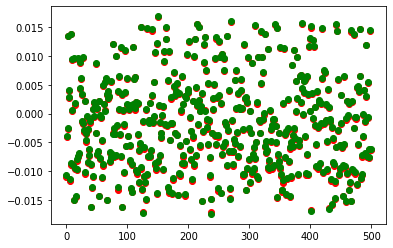

In [64]:
results = model.predict(x_test)
plt.scatter(range(500),results[0:500,0],c='r')
plt.scatter(range(500),y_test[0:500,0],c='g')
plt.show()

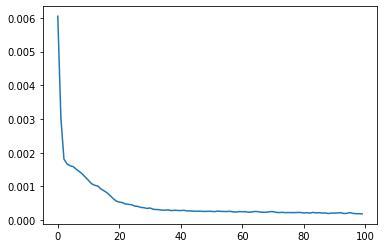

In [66]:
plt.plot(history.history['loss'])
plt.show()

As can be seen by the two plots, our model is able to predict the next state of the system with great accuracy and the loss is almost stagnant by 40 epochs. 
